<a href="https://colab.research.google.com/github/jasveenkaur1299/MachineLearning/blob/master/Algorithms/Kmeans/income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

In [2]:
uploaded=files.upload()

Saving income.csv to income.csv


In [3]:
df=pd.read_csv('income.csv')

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
from sklearn.cluster import KMeans

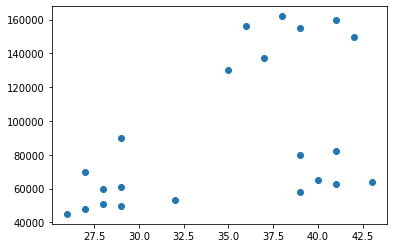

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Income($)'])

In [74]:
km=KMeans(n_clusters=3)

In [75]:
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [76]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


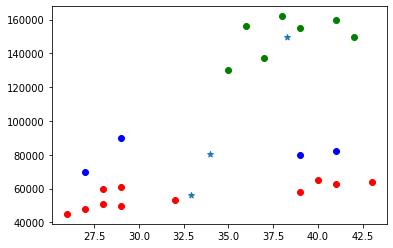

In [60]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'],color='Green')

plt.scatter(df1['Age'],df1['Income($)'],color='Blue')
plt.scatter(df2['Age'],df2['Income($)'],color='Red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*')

In [77]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

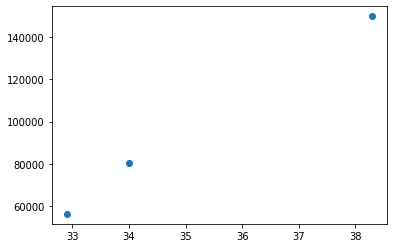

In [51]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='o')

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler=MinMaxScaler()


In [65]:
scaler.fit(df[['Income($)']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [67]:
df['Income($)']=scaler.transform(df[['Income($)']])

In [68]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,0


In [69]:
scaler.fit(df[['Age']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [70]:
df['Age']=scaler.transform(df[['Age']])

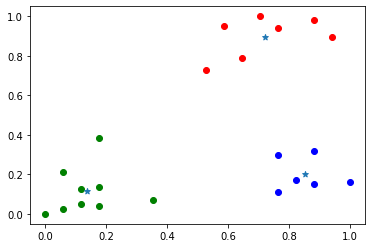

In [78]:
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]

plt.scatter(df0['Age'],df0['Income($)'],color='Green')

plt.scatter(df1['Age'],df1['Income($)'],color='Blue')
plt.scatter(df2['Age'],df2['Income($)'],color='Red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*')

In [72]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [79]:
len(df['Age'])

22

In [87]:
rng=range(1,22)
sse=[]
for k  in rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)




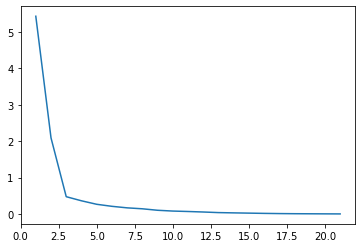

In [93]:
plt.plot(rng,sse)